# Digits recognitions

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.0.0
Keras version: 2.2.4-tf


In [2]:
# 60000 of 28x28 px images of hand-written digits from 0 to 9
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


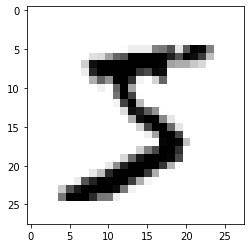

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [6]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [7]:
# with np.printoptions(precision=2, suppress=True):
#     print(x_train[0])

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.36,0.05,0.34,0.52,0.51,0.26,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.05,...,0.28,0.22,0.32,0.31,0.25,0.08,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.29,0.31,...,0.11,0.10,0.10,0.07,0.05,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.29,0.34,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.32,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


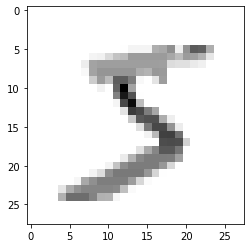

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

In [11]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [13]:
training_history = model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2640 - accuracy: 0.9217
Epoch 2/3
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1099 - accuracy: 0.9658
Epoch 3/3
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0753 - accuracy: 0.9761 - loss: 0


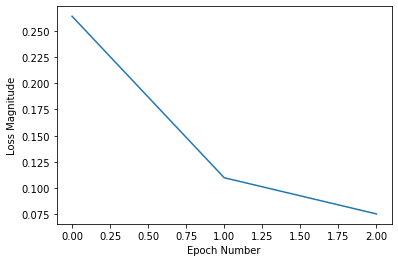

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(training_history.history['loss'])

In [15]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

In [16]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.08943285667626187
Validation accuracy:  0.9725


In [17]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model shuold be saved to HDF5.
model_name = 'digits_recognition.h5'
model.save(model_name, save_format='h5')

In [18]:
loaded_model = tf.keras.models.load_model(model_name)

In [19]:
predictions = loaded_model.predict([x_test])

In [20]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


In [21]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,1.005661e-09,2.095668e-07,6.170125e-06,2.400010e-06,3.501843e-09,1.265657e-09,9.701858e-12,9.999905e-01,3.182415e-08,7.043027e-07
1,2.274118e-06,3.723308e-06,9.998906e-01,2.915286e-05,2.304606e-09,1.179056e-06,5.320852e-07,1.935687e-06,7.066179e-05,4.299404e-11
2,1.839784e-08,9.997205e-01,5.813596e-06,3.353797e-06,1.340757e-04,7.965579e-07,1.993341e-06,1.093209e-04,1.835632e-05,5.679666e-06
3,9.996427e-01,1.165578e-07,9.824144e-05,1.263321e-06,1.230670e-06,4.644668e-06,1.457215e-04,7.910841e-05,1.230456e-05,1.476011e-05
4,7.404809e-07,5.354981e-07,4.803916e-07,1.320712e-07,9.959008e-01,7.233953e-07,7.555286e-07,9.935594e-05,3.556065e-06,3.992924e-03
...,...,...,...,...,...,...,...,...,...,...
9995,9.576487e-10,1.509229e-05,9.985939e-01,1.275004e-03,3.551228e-13,1.123465e-08,3.764638e-11,2.630205e-05,8.971027e-05,9.301044e-10
9996,2.602900e-07,6.403623e-06,2.793669e-05,9.971831e-01,2.552148e-08,2.214037e-03,1.230934e-08,4.443628e-06,3.199692e-04,2.437693e-04
9997,3.606108e-10,3.585323e-07,1.275568e-10,1.795690e-08,9.998108e-01,2.858774e-09,2.987172e-08,3.239731e-05,8.790580e-06,1.476764e-04
9998,2.098820e-07,5.966628e-07,6.058870e-08,4.812068e-06,1.095339e-06,9.984432e-01,3.638331e-06,1.022837e-07,1.545819e-03,4.967967e-07


In [22]:
print(np.argmax(predictions[0]))

7


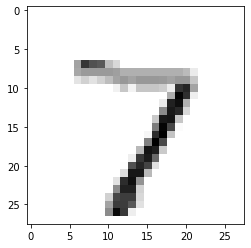

In [23]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()